# Import libraries

Import the libraries to be used in the study.


*   Import pandas to perform data processing
*   Import numpy for linear algebra functions.







In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra

# Load the data set

The data is taken from titanic - Machine Learning from Disaster.

https://www.kaggle.com/c/titanic/data


The train, test and gender are the data sets.

In [2]:
df_train = pd.read_csv(r'/Users/Jason/Documents/GitHub/Python-data-science/titanic/train.csv')
df_test = pd.read_csv(r'/Users/Jason/Documents/GitHub/Python-data-science/titanic/test.csv')
df_gender = pd.read_csv(r'/Users/Jason/Documents/GitHub/Python-data-science/titanic/gender_submission.csv')

# Display first 5 rows for train, test and gender data set.

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Print the data dimensions

(rows, columns)

In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.shape

(418, 11)

In [8]:
df_gender.shape

(418, 2)

# **Let us proceed to focus on train data set we will look at the rest later.

# View summary of data frame


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check for missing values
Age, cabin and Embarked have 177, 687 and 2 respectively.

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since Age is numerical, you can fill missing values with the mean, median, or mode.

Drop the Column: If the Cabin feature is not critical and has too many missing values, consider dropping it.

Impute with the Mode: Since Embarked is categorical, fill missing values with the most frequent category.

In [11]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)  # Using median to handle outliers better
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)

/var/folders/9p/3xycjzdd6q12x2qc0vjhtgnw0000gp/T/ipykernel_2525/4209730822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)  # Using median to handle outliers better
/var/folders/9p/3xycjzdd6q12x2qc0vjhtgnw0000gp/T/ipykernel_2525/4209730822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the i

In [12]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Remove duplicate Passenger ID

In [14]:
df_train.drop_duplicates(subset='PassengerId', keep='first', inplace=True)

Check if any duplicate Passenger ID exist

In [15]:
df_train.duplicated().sum()

0

# Display survivors
Survived:
0 = No
1 = Yes

In [16]:
df_train[df_train["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


# Print the total number of survivors
first part filters the rows of survived = 1 which means survived.

shape[0] counts the number of rows

In [17]:
total_survivors = df_train[df_train["Survived"] == 1].shape[0]
total_survivors

342

Print the total non-survivors

In [18]:
total_non_survivors = df_train[df_train["Survived"] == 0].shape[0]
total_non_survivors

549

From the observation above less people survived the Titanic.

# Total survivors based on gender

In [19]:
total_female_survivors = df_train[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female')].shape[0]
total_female_survivors

233

In [20]:
total_male_survivors = df_train[(df_train['Survived'] ==1) & (df_train['Sex'] == 'male')].shape[0]
total_male_survivors

109

There are less male survivors, to test if it's true let us see if male non-survivors have a higher number than female non-survivors.

In [21]:
total_femake_non_survivors = df_train[(df_train['Survived'] == 0) & (df_train['Sex'] == 'female')].shape[0]
total_femake_non_survivors

81

In [22]:
total_male_non_survivors = df_train[(df_train['Survived'] == 0) & (df_train['Sex'] == 'male')].shape[0]
total_male_non_survivors

468

# Use Group By function

let us group by the Pclass (ticket class)

* 1 = 1st class
* 2 = 2nd class
* 3 = 3rd class

In [23]:
df_train.groupby(df_train['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,216
2,184,184,184,184,184,184,184,184,184,184
3,491,491,491,491,491,491,491,491,491,491


# Use Regex

In [24]:
import re
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
df_train.loc[df_train['Name'].str.contains('Mr|Mrs', flags=re.I, regex=True) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Check for a Mr. Smith or Mrs. James

In [26]:
df_train.loc[df_train['Name'].str.contains('Mr. James | Mrs. Smith', flags=re.I, regex=True )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,C
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,S
250,251,0,3,"Reed, Mr. James George",male,28.0,0,0,362316,7.2500,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,S


# Use Matplotlib and Seaborn for data visulaization

## Create Box plot for survival rate

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

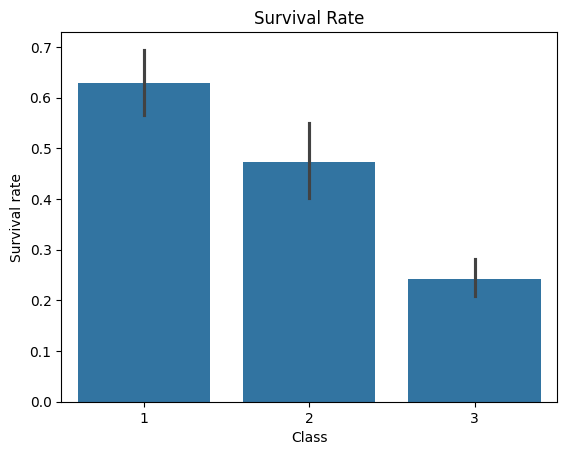

In [28]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Survival Rate')
plt.xlabel('Class')
plt.ylabel('Survival rate')
plt.show()

As shown above according to the data frame, those in Pclass 1 are had a higher survival rate. The dsurvival rate is out of 1

## Create survival count plot 

It counts the number of observations from each categorical bin(group of values that are group together). The count is also divided based on gender. 

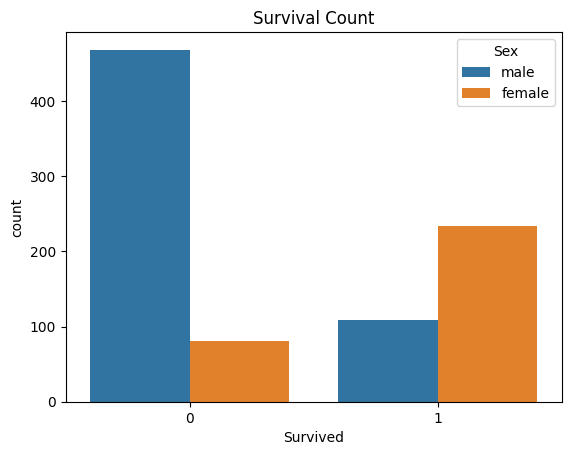

In [29]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival Count')
plt.show()

# Create an age distribution histogram

The histogram will have bins(intervals). The kde will show a smoothed version of the histopgram look.

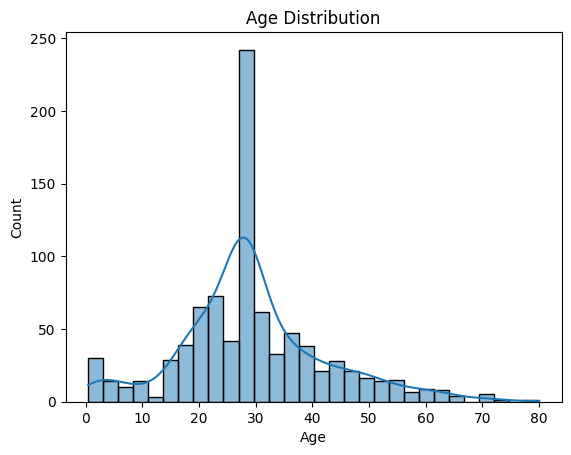

In [30]:
sns.histplot(df_train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [31]:
df_train['Age'].mode()

0    28.0
Name: Age, dtype: float64

The mode confirms that most passengers were aged 28 in the df_train data frame.